In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from numba import jit

In [2]:
def franke(x, y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

## Visualization of Franke Function

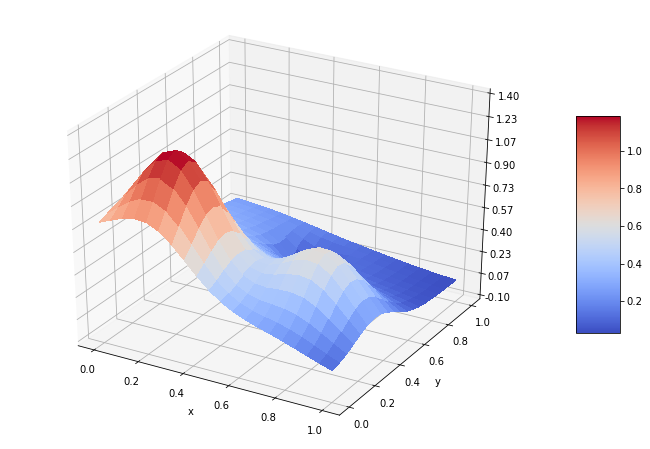

In [3]:
# Make data
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
x, y = np.meshgrid(x, y)

z = franke(x, y)

# Plot the surface
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the axes
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel("x")
plt.ylabel("y")

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Setup of data

In [4]:
@jit
def designMatrix(x, y, order):
    n = x.size
    p = int((order + 1) * (order + 2) / 2) # number of columns in X. (from sum of numbers up to order + 1 formula). 21 for order = 5
    X = np.zeros((n, p))
    feature = 0
    for x_power in range(order + 1):
        for y_power in range(order - x_power + 1):
            X[:, feature] = x**x_power * y**y_power
            feature += 1
    return X

In [28]:
# Constants
n = 1000 # datapoints
order = 5 # max order of polynomials

# Data
x = np.random.rand(n) #an array of 100 unordered uniform random numbers from 0 to 1
x.sort()
y = np.random.rand(n)
y.sort()
z = franke(x, y)

# Design matrix, splitting and scaling
X = designMatrix(x, y, order)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
scaler = StandardScaler() #subtracts mean from each feature and divides by the standard deviation
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:, 0] = 1 # scaling removed the intercept terms
X_test = scaler.transform(X_test)
X_test[:, 0] = 1

## Regression methods

In [29]:
def OLS(X, y):
    beta = np.linalg.inv(X.T @ X) @ X.T @ y # beta = (X.T X)^-1 X.T y
    return beta

def ridge(X, y, lmda):
    beta = np.linalg.inv(X.T @ X + lmda * I) @ X.T @ y
    return beta

#beta = np.linalg.pinv(X_train) @ z_train # finds OLS for singular matrix using SVD and psuedoinverse

## Part a): Ordinary Least Square (OLS) on the Franke function 

In [30]:
beta = OLS(X_train, z_train)
z_mdl = X_test @ beta
print(mean_squared_error(z_mdl, z_test))

0.0035712919008294187
